In [3]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

In [4]:
data = pd.read_csv('C:\\Users\\icosane\\Documents\\univ\\archive (2)\\apple_quality.csv')

#https://www.kaggle.com/datasets/zeesolver/apple-quality

In [5]:
data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


In [6]:
target = []
for i in data['Quality']:
  if i == 'good':
    target.append(0)
  if i == 'bad':
    target.append(1)
data['Target'] = target

In [7]:
#разделим на набор признаков и данных

In [8]:
X = data.drop(columns=['A_id','Quality','Target'])
X.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984


In [9]:
y = data['Target'].values
y[0:5]

array([0, 0, 1, 0, 0], dtype=int64)

In [10]:
import graphviz
import pydotplus
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz

In [11]:
# Обучим дерево на всех признаках
tree_cl = DecisionTreeClassifier(random_state=1)
tree_cl.fit(X, y)
tree_cl

DecisionTreeClassifier(random_state=1)

In [12]:
from IPython.core.display import HTML
from sklearn.tree import export_text
tree_rules = export_text(tree_cl, feature_names=list(X.columns))
HTML('<pre>' + tree_rules + '</pre>')

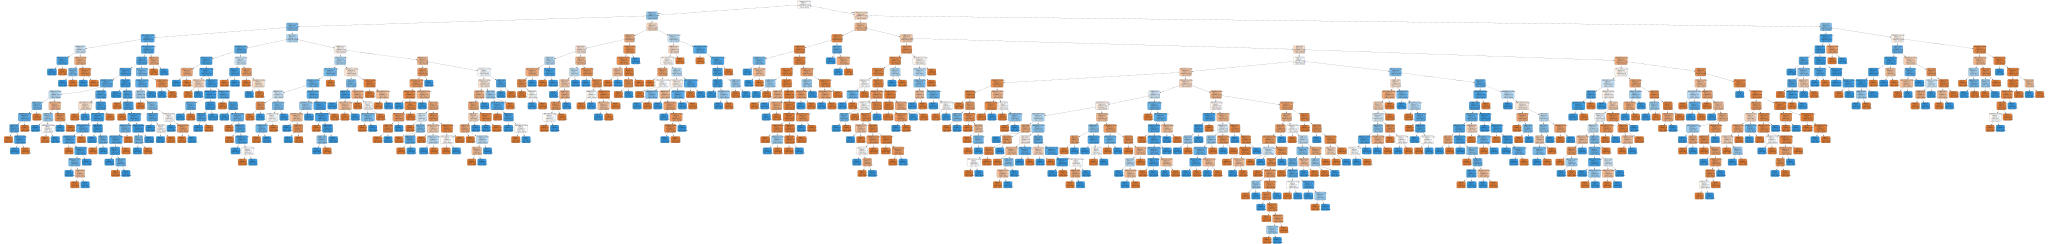

In [13]:
dot_data = export_graphviz(tree_cl, out_file=None, 
                           feature_names=X.columns, 
                           class_names=data.Quality, 
                           filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [14]:
list(zip(X.columns.values, tree_cl.feature_importances_))

[('Size', 0.16523352718646087),
 ('Weight', 0.10960393454771324),
 ('Sweetness', 0.1500173857991453),
 ('Crunchiness', 0.08233039877351869),
 ('Juiciness', 0.14724820930666227),
 ('Ripeness', 0.2002182293383274),
 ('Acidity', 0.14534831504817233)]

In [15]:
# Важность признаков в сумме дает единицу
sum(tree_cl.feature_importances_)

1.0

In [16]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

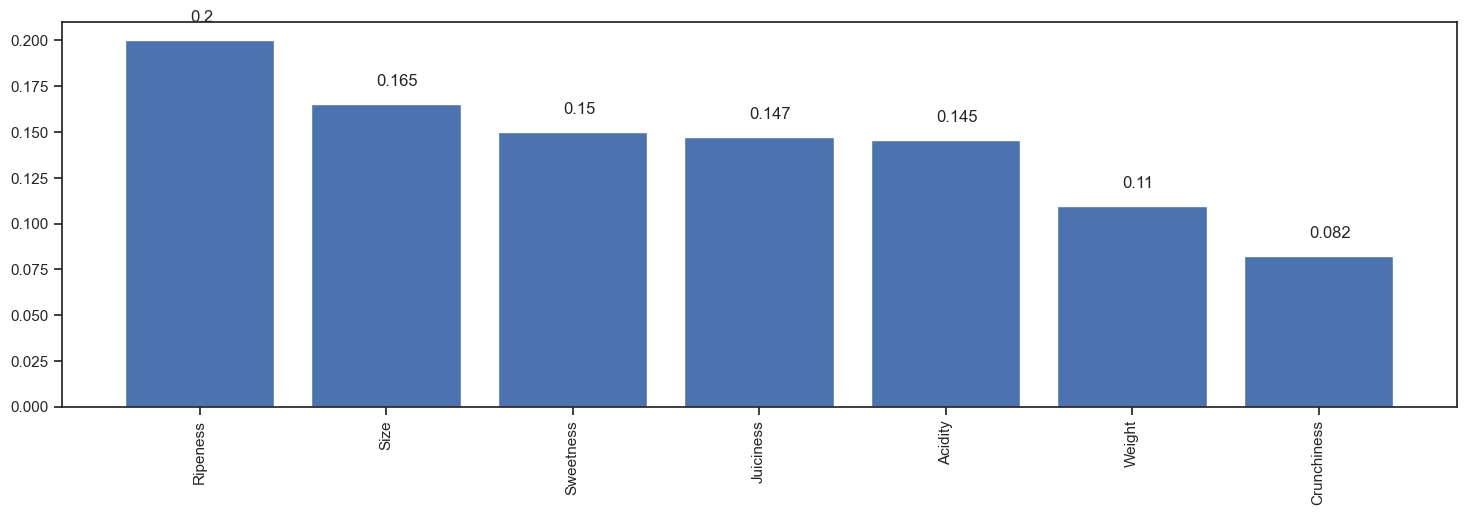

In [17]:
tree_cl_fl, tree_cl_fd = draw_feature_importances(tree_cl, X)

In [18]:
# Список признаков, отсортированный на основе важности, и значения важности
tree_cl_fl, tree_cl_fd

(['Ripeness',
  'Size',
  'Sweetness',
  'Juiciness',
  'Acidity',
  'Weight',
  'Crunchiness'],
 [0.2002182293383274,
  0.16523352718646087,
  0.1500173857991453,
  0.14724820930666227,
  0.14534831504817233,
  0.10960393454771324,
  0.08233039877351869])

In [19]:
X.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984


In [21]:
# Пересортируем признаки на основе важности
X_sorted = X[tree_cl_fl]
X_sorted.head()

,Ripeness,Size,Sweetness,Juiciness,Acidity,Weight,Crunchiness
0,0.329840,-3.970049,5.346330,1.844900,-0.491590,-2.512336,-1.012009
1,0.867530,-1.195217,3.664059,0.853286,-0.722809,-2.839257,1.588232
2,-0.038033,-0.292024,-1.738429,2.838636,2.621636,-1.351282,-0.342616
3,-3.413761,-0.657196,1.324874,3.637970,0.790723,-2.271627,-0.097875
4,-1.303849,1.364217,-0.384658,3.030874,0.501984,-1.296612,-0.553006


In [22]:
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(
    X_sorted, y, test_size=0.5, random_state=1)
X_train.shape, X_test.shape

((2000, 7), (2000, 7))

In [23]:
# Обучим дерево и предскажем результаты на всех признаках 
tree_cl_feat_1 = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
y_test_predict = tree_cl_feat_1.predict(X_test)
y_test_predict.shape

(2000,)

In [25]:
def accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    """
    Вычисление метрики accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса, 
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame 
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют 
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    """
    Вывод метрики accuracy для каждого класса
    """
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

In [26]:
# Проверим точность по классам
print_accuracy_score_for_classes(y_test, y_test_predict)

Метка 	 Accuracy
0 	 0.8092835519677094
1 	 0.7958374628344896


In [27]:
# Обучим дерево и предскажем результаты на единственном самом важном признаке 
tree_cl_feat_2 = DecisionTreeClassifier(random_state=1).fit(X_train[[tree_cl_fl[0]]], y_train)
y_test_predict_2 = tree_cl_feat_2.predict(X_test[[tree_cl_fl[0]]])
y_test_predict_2.shape

(2000,)

In [28]:
# Проверим точность по классам
print_accuracy_score_for_classes(y_test, y_test_predict_2)

Метка 	 Accuracy
0 	 0.6185671039354188
1 	 0.48662041625371655


In [30]:
classification_report(y_test_predict_2, y_train, 
                      target_names=['Good','Bad'], output_dict=True)

{'Good': {'precision': 0.5715695952615992,
  'recall': 0.5119363395225465,
  'f1-score': 0.5401119402985074,
  'support': 1131.0},
 'Bad': {'precision': 0.44072948328267475,
  'recall': 0.5005753739930955,
  'f1-score': 0.46874999999999994,
  'support': 869.0},
 'accuracy': 0.507,
 'macro avg': {'precision': 0.506149539272137,
  'recall': 0.506255856757821,
  'f1-score': 0.5044309701492536,
  'support': 2000.0},
 'weighted avg': {'precision': 0.5147195666067566,
  'recall': 0.507,
  'f1-score': 0.5091051772388059,
  'support': 2000.0}}